In [1]:
import numpy as np
import tensorflow as tf

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.12.0


# Создание FCN модели
Для создания иодели создадим собственный класс, наследованный от tf.keras.Model. Ранее мы использовали лишь сверткм и пуллинги для
извлечения признаков и понижения пространственных размерностей. Это был наш энкодер. В качестве Декодера у нас был простой Upscale
слой который просто расширял изображение до нужного размера. Теперь давайте реализуем более качественный Декодер с использованием слоёв для
повышения разрешения.
В примере ниже будем использовать Unpooling (в кераме это делаем слой tf.keras.layers.UpSampling2D) перемещающийся со сверточными
слоями.

In [2]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv3 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv4 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv5 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')
        self.conv6 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')
        
        self.conv7 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv8 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv9 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv10 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv11 = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')
        
        self.pooling = tf.keras.layers.MaxPool2D((2, 2))
        self.unpool = tf.keras.layers.UpSampling2D((2, 2))
    
    def call(self, x):
        
        # Encoder
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.pool(out)
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.pool(out)
        out = self.conv5(out)
        out = self.conv6(out)
        
        # Decoder
        out = self.unpool(out)
        out = self.conv7(out)
        out = self.conv8(out)
        out = self.unpool(out)
        out = self.conv9(out)
        out = self.conv10(out)
        out = self.conv11(out)
        
        return out

model = Model()


Metal device set to: Apple M2


In [3]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv3 = tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu')
        self.conv4 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv5 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv6 = tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu')
        self.conv7 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')
        self.conv8 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')
        
        self.conv9 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv10 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        self.conv11= tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv12 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv13 = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')
        
        self.unpool = tf.keras.layers.UpSampling2D((2, 2))
    
    def call(self, x):
        
        # Encoder
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.conv5(out)
        out = self.conv6(out)
        out = self.conv7(out)
        out = self.conv8(out)
        
        # Decoder
        out = self.unpool(out)
        out = self.conv9(out)
        out = self.conv10(out)
        out = self.unpool(out)
        out = self.conv11(out)
        out = self.conv12(out)
        out = self.conv13(out)
        
        return out

model = Model()


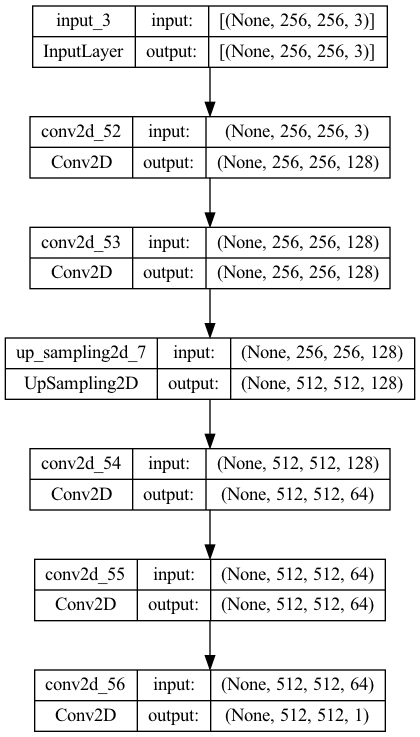

In [6]:
x = tf.keras.layers.Input((256, 256, 3))

# Encoder
out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(out)
out = tf.keras.layers.MaxPool2D((2, 2))(out)
out = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(out)
out = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(out)
out = tf.keras.layers.MaxPool2D((2, 2))(out)
out = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(out)
out = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(out)

# Decoder
out = tf.keras.layers.UpSampling2D((2, 2))(out)
out = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
out = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(out)
out = tf.keras.layers.UpSampling2D((2, 2))(out)
out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(out)
out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(out)
out = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')(out)

model = tf.keras.Model(inputs=x, outputs=out)
tf.keras.utils.plot_model(
    model,
    show_shapes=True)